<a href="https://colab.research.google.com/github/ayakurtam/Aya-Kurtam/blob/master/MNIST_digit_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import mnist

# Loading - "MNIST Data Set "

### Containing Training samples = 60,000  ,Testing Samples =10,000.

### Divide into train and test dataset

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

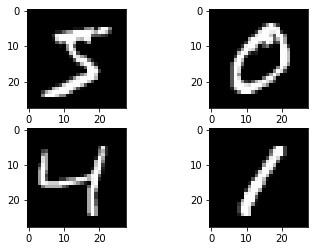

In [7]:
## just check the graph, how data looks like
import matplotlib.pyplot as plt

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
## in order to execute the graph
## however we dont know whether its colored image or binary images
## so inorder to plot it change the configuration

## Checking the values of each pixel 
### before Normalization

In [8]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test/ 255

## After Normalization

In [10]:
print( x_train[0]) ##  you can see all values are now Normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing image to make it suitable for apply Convolution operation

In [11]:
# reshape to be [samples][width][height][channels]
x_trainr = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_testr = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

print ("Training Samples dimension : ", x_trainr.shape)
print ("Training Samples dimension : " ,x_testr.shape)

Training Samples dimension :  (60000, 28, 28, 1)
Training Samples dimension :  (10000, 28, 28, 1)


### One hot encoding of the class values from 0 to 9., transforming the vector of class integers into a binary matrix.

In [12]:
# one hot encode outputs
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Creating a Deep Neural Network
## Training on 60,000 samples of MNIST handwritten dataset

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [14]:
def Cnn_model():
    # create model
    model = Sequential()
    
    ## 1st Convolution Layer with 30 feature maps of size 5×5.
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    ## only for first Convolution layer to mention input layer size 
    ## Activation function to make it non-linear, <0, remove, >0 
    model.add(MaxPooling2D())## Maxpooling single maximum value of 2x2 patches
    
    ## 2nd Convolution Layer with 15 feature maps of size 3×3.
    model.add(Conv2D(15, (3, 3), activation='relu'))## 2nd Convolution Layer
    model.add(MaxPooling2D())## Maxpooling single maximum value of 2x2 patches
    model.add(Dropout(0.2))## Dropout layer with a probability of 20%.
    
    ### before using fully connected layer, need to be flatten so that 2D to 1D
    model.add(Flatten())

    #### Fully Connected Layer #1 with 128 neurons and rectifier activation.
    model.add(Dense(128, activation='relu'))
    
    #### Fully Connected Layer #2 with 50 neurons and rectifier activation
    model.add(Dense(50, activation='relu'))
    
    #### Last Fully Connected Layer (Output layer) ,output must be equal to number of classes, 10 (0-9)
    model.add(Dense(num_classes, activation='softmax'))### activation function is changed to softmax ( class probablites)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
# build the model
model = Cnn_model()

In [16]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [18]:
# Fit the model ## training my model
model.fit(x_trainr, y_train, validation_data=(x_testr, y_test), epochs=10,validation_split=0.03,batch_size=20, verbose=2)

Epoch 1/10
2910/2910 - 34s - loss: 0.1711 - accuracy: 0.9471 - val_loss: 0.0477 - val_accuracy: 0.9894
Epoch 2/10
2910/2910 - 32s - loss: 0.0670 - accuracy: 0.9786 - val_loss: 0.0405 - val_accuracy: 0.9911
Epoch 3/10
2910/2910 - 33s - loss: 0.0512 - accuracy: 0.9842 - val_loss: 0.0494 - val_accuracy: 0.9900
Epoch 4/10
2910/2910 - 32s - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0272 - val_accuracy: 0.9950
Epoch 5/10
2910/2910 - 31s - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.0352 - val_accuracy: 0.9928
Epoch 6/10
2910/2910 - 32s - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0329 - val_accuracy: 0.9950
Epoch 7/10
2910/2910 - 32s - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0341 - val_accuracy: 0.9944
Epoch 8/10
2910/2910 - 31s - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0500 - val_accuracy: 0.9906
Epoch 9/10
2910/2910 - 33s - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0295 - val_accuracy: 0.9956
Epoch 10/10
2910/2910 - 32s - loss: 0.0224 - accuracy: 0.9925 - val_loss:

In [19]:
### Evaluting on testing data set MNIST
test_loss,test_acc=model.evaluate(x_testr,y_test)
print ("Test Loss on 10.000 test samples " ,test_loss)
print ("Validation Accuracy on 10.000 test samples  " ,test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0278 - accuracy: 0.9923
Test Loss on 10.000 test samples  0.027810772880911827
Validation Accuracy on 10.000 test samples   0.9922999739646912


In [20]:
# Final evaluation of the model
scores = model.evaluate(x_testr, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.77%


In [21]:
# predictions = new_model.predict([x_test]) ## there is specialized method for efficeintly saving your model   
predicions =model.predict([x_testr])

In [22]:
print(predicions)## actually these predictions are based on one hot encodeing so these are only arrays , containing softmax probilites

[[3.0174976e-14 2.4411662e-10 3.2778960e-09 ... 1.0000000e+00
  7.4393795e-13 2.6903439e-09]
 [2.1704727e-10 6.3521801e-09 1.0000000e+00 ... 5.2495019e-10
  8.2420444e-09 3.5623627e-15]
 [1.1618850e-09 9.9999905e-01 9.1465537e-09 ... 9.0868076e-07
  5.8137708e-09 1.5452994e-08]
 ...
 [5.8382959e-13 6.1779667e-07 2.2812253e-10 ... 9.5675404e-08
  1.9588884e-09 3.6858587e-08]
 [2.8997896e-11 2.2349509e-13 9.1190682e-18 ... 1.5819416e-14
  8.3206608e-08 2.8469210e-11]
 [6.4905412e-06 4.3864856e-07 3.0767961e-08 ... 7.9826291e-11
  1.1091539e-06 1.1222315e-08]]


In [23]:
## in order to understand , convert the predictions from one hot encoding , we need to use numpy for that
import numpy as np

print (np.argmax(predicions[0]))### so acuzlly argmax will return the maximum value index and find the value of it 

7


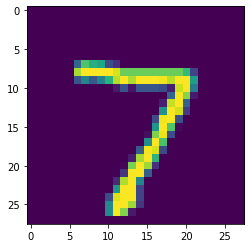

In [36]:
## now to check that answer is true or not
import matplotlib.pyplot as plt

plt.imshow(x_test[0])

In [37]:
import cv2

In [49]:
img =cv2.imread('/content/test_images/8.png')

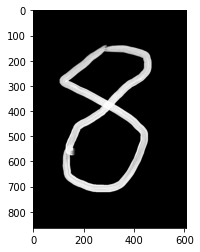

In [50]:
plt.imshow(img)

In [51]:
img.shape

(864, 608, 3)

In [52]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [53]:
gray.shape

(864, 608)

In [54]:
resized =cv2.resize(gray,(28,28),interpolation =cv2.INTER_AREA)


In [55]:
resized.shape

(28, 28)

In [56]:
new_img =resized / 255

In [57]:
new_img= np.array(new_img).reshape(-1,28,28,1)

In [58]:
predicions =model.predict(new_img)

In [59]:
print (np.argmax(predicions))

8
